In [4]:
import numpy as np
from sympy import *
init_printing()

In [5]:
U11, U12, U13, U21, U22, U23, U31, U32, U33 = \
symbols('U_11 U_12 U_13 U_21 U_22 U_23 U_31 U_32 U_33')

th1, th2, th3=symbols('theta_1 theta_2 theta_3') #Vacuum mixing angles
C1, C2, C3, S1, S2, S3=symbols('C_1 C_2 C_3 S_1 S_2 S_3')
C1=cos(th1)
C2=cos(th2)
C3=cos(th3)
S1=sin(th1)
S2=sin(th2)
S3=sin(th3)
U11=C2*C3
U12=S3*C2
U13=S2
U21=-S3*C1-S1*S2*C3
U22=C1*C3-S1*S2*S3
U23=S1*C2
U31=S1*S3-S2*C1*C3
U32=-S1*C3-S2*S3*C1
U33=C1*C2
CKM=Matrix([[U11, U12, U13], [U21, U22, U23], [U31, U32, U33]])
CKM

⎡             cos(θ₂)⋅cos(θ₃)                             sin(θ₃)⋅cos(θ₂)     
⎢                                                                             
⎢-sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) - sin(θ₃)⋅cos(θ₁)  -sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) + cos(θ₁
⎢                                                                             
⎣sin(θ₁)⋅sin(θ₃) - sin(θ₂)⋅cos(θ₁)⋅cos(θ₃)   -sin(θ₁)⋅cos(θ₃) - sin(θ₂)⋅sin(θ₃

               sin(θ₂)    ⎤
                          ⎥
)⋅cos(θ₃)  sin(θ₁)⋅cos(θ₂)⎥
                          ⎥
)⋅cos(θ₁)  cos(θ₁)⋅cos(θ₂)⎦

In [6]:
Ue1, Ue2, Ue3, Umu1, Umu2, Umu3, Ut1, Ut2, Ut3 = \
symbols('U_e1 U_e2 U_e3 U_mu1 U_mu2 U_mu3 U_tau1 U_tau2 U_tau3')
CKMgen=Matrix([[Ue1, Ue2, Ue3], [Umu1, Umu2, Umu3], [Ut1, Ut2, Ut3]])
ICKMgen=CKMgen.transpose()


In [7]:
ICKM=simplify(CKM**-1) #Inverse CKM matrix
E1, E2, E3 =symbols('E_1 E_2 E_3')
Hm0=Matrix([[E1, 0, 0], [0, E2, 0], [0, 0, E3]]) #Hamiltonian in mass eigenbase

In [8]:
A=symbols('A') #Matter density
Vf=A*Matrix([[1, 0, 0], [0, 0, 0], [0, 0, 0]])# Perturbation flavor basis
Vf

⎡A  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [31]:
Vm=ICKMgen*Vf*CKMgen # Perturbation mass basis

Hm=Hm0+Vm
Hm


⎡     2                               ⎤
⎢A⋅Uₑ₁  + E₁   A⋅Uₑ₁⋅Uₑ₂    A⋅Uₑ₁⋅Uₑ₃ ⎥
⎢                                     ⎥
⎢                  2                  ⎥
⎢ A⋅Uₑ₁⋅Uₑ₂   A⋅Uₑ₂  + E₂   A⋅Uₑ₂⋅Uₑ₃ ⎥
⎢                                     ⎥
⎢                               2     ⎥
⎣ A⋅Uₑ₁⋅Uₑ₃    A⋅Uₑ₂⋅Uₑ₃   A⋅Uₑ₃  + E₃⎦

In [32]:
Id=Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
T=simplify(Hm-(E1+E2+E3+A)/3*Id)
T=T.as_mutable()
E12, E13, E21, E23, E31, E32=symbols('E_12 E_13 E_21 E_23 E_31 E_32')
#E12=E1-E2
#E13=E1-E3
#E21=E2-E1
#E23=E2-E3
#E32=E3-E2
#E31=E3-E1
T[0,0]=T[0, 0]-(2*E1-E2-E3)/3+(E12 + E13)/3
T[1,1]=T[1, 1]-(2*E2-E1-E3)/3+(-E12 + E23)/3
T[2,2]=T[2, 2]-(2*E3-E1-E2)/3+(-E13 - E23)/3

T

⎡     2   A   E₁₂   E₁₃                                                ⎤
⎢A⋅Uₑ₁  - ─ + ─── + ───        A⋅Uₑ₁⋅Uₑ₂               A⋅Uₑ₁⋅Uₑ₃       ⎥
⎢         3    3     3                                                 ⎥
⎢                                                                      ⎥
⎢                             2   A   E₁₂   E₂₃                        ⎥
⎢      A⋅Uₑ₁⋅Uₑ₂         A⋅Uₑ₂  - ─ - ─── + ───        A⋅Uₑ₂⋅Uₑ₃       ⎥
⎢                                 3    3     3                         ⎥
⎢                                                                      ⎥
⎢                                                     2   A   E₁₃   E₂₃⎥
⎢      A⋅Uₑ₁⋅Uₑ₃               A⋅Uₑ₂⋅Uₑ₃         A⋅Uₑ₃  - ─ - ─── - ───⎥
⎣                                                         3    3     3 ⎦

In [33]:
lam=symbols('lambda')
char_pol=(lam*Id-T).det()
char_pol=simplify(char_pol)

In [34]:

char_pol=collect(char_pol, lam)

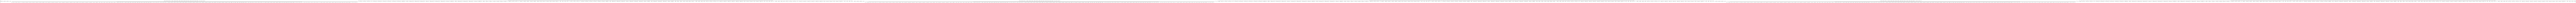

In [35]:
solve(char_pol, lam)